# Q. Delivery_time -> Predict delivery time using sorting time. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sweetviz as sv

In [2]:
delidata = pd.read_csv('delivery_time.csv')
delidata

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


#### Initian investigation:

In [3]:
delidata.shape

(21, 2)

In [4]:
delidata.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
delidata.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
dtype: bool

In [6]:
delidata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
sweet_report=sv.analyze(delidata)
sweet_report.show_html('Delivery_time_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report Delivery_time_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [8]:
delidata['Sorting Time'] = delidata['Sorting Time'].astype(float)
delidata.info(),delidata.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     float64
dtypes: float64(2)
memory usage: 464.0 bytes


(None,
    Delivery Time  Sorting Time
 0          21.00          10.0
 1          13.50           4.0
 2          19.75           6.0
 3          24.00           9.0
 4          29.00          10.0)

In [9]:
delidata.rename({'Delivery Time': 'Delivery_Time'}, axis=1,inplace=True)
delidata.rename({'Sorting Time': 'Sorting_Time'}, axis=1,inplace=True)

<AxesSubplot:>

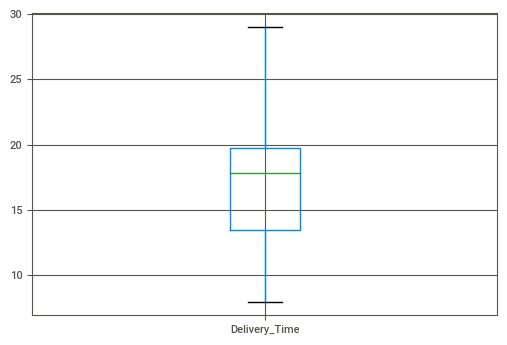

In [10]:
delidata.boxplot(column='Delivery_Time')

<AxesSubplot:>

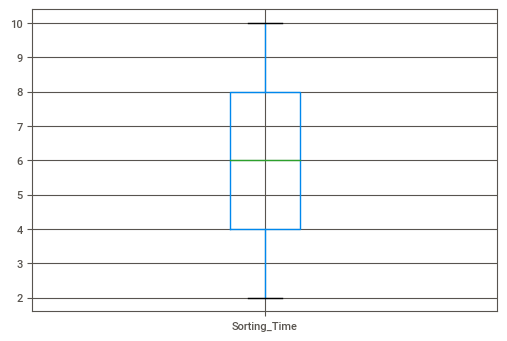

In [11]:
delidata.boxplot(column='Sorting_Time')

In [12]:
delidata.skew()

Delivery_Time    0.352390
Sorting_Time     0.047115
dtype: float64

In [13]:
delidata.kurt()

Delivery_Time    0.317960
Sorting_Time    -1.148455
dtype: float64

In [14]:
import warnings

In [15]:
warnings.filterwarnings("ignore")

<AxesSubplot:ylabel='Density'>

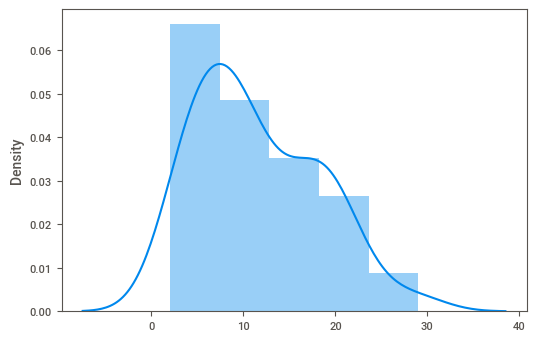

In [16]:
sns.distplot(delidata)

In [17]:
delidata['Delivery_Time'] = np.sqrt(delidata['Delivery_Time'])
delidata['Sorting_Time'] = np.sqrt(delidata['Sorting_Time'])

In [18]:
delidata.skew()

Delivery_Time   -0.061811
Sorting_Time    -0.259816
dtype: float64

<AxesSubplot:ylabel='Density'>

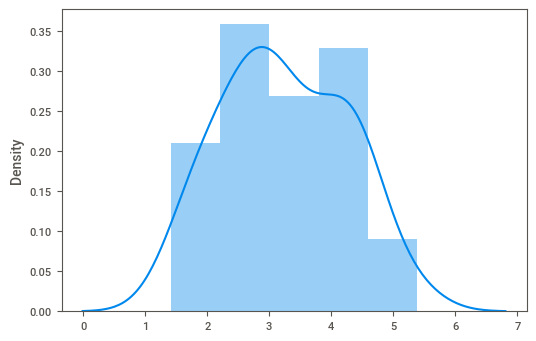

In [19]:
sns.distplot(delidata)

#### Linearity Check:

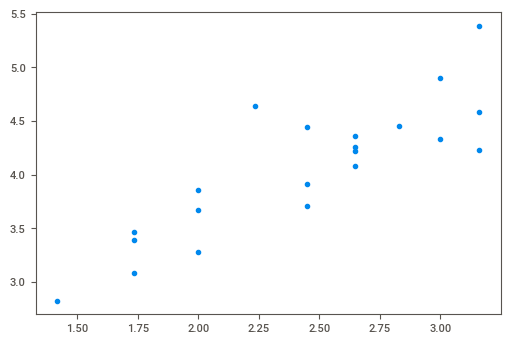

In [20]:
plt.scatter(x='Sorting_Time',y='Delivery_Time',data=delidata)

In [21]:
delidata.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.853933
Sorting_Time,0.853933,1.000000


#### Assumptions Check:

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

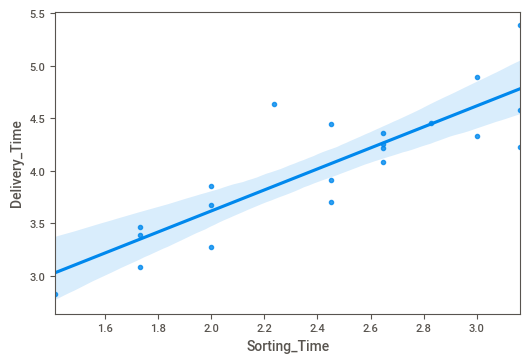

In [22]:
sns.regplot(x='Sorting_Time',y='Delivery_Time',data=delidata)

In [23]:
#No Multicollinearity (coz only one input)
#No Auto Regression (output isnt influence by time)
#No Hetroscadacity ( Variance across the data is aprox. simmilar)

#### Model Building:

In [24]:
import statsmodels.formula.api as sfa

In [25]:
Delivery_LRM = sfa.ols(('Delivery_Time~Sorting_Time'),data=delidata).fit()
Delivery_LRM

#### Model Evaluation:

In [26]:
Delivery_LRM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Sun, 27 Mar 2022   Prob (F-statistic):           8.48e-07
Time:                        13:55:10   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.6135      0.349      4.628      0.000       0.884       2.343
Sorting_Time     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Testing & Predicting data:

In [27]:
test_data = delidata[['Sorting_Time']]
test_data

,Sorting_Time
0,3.162278
1,2.000000
2,2.449490
3,3.000000
4,3.162278
5,2.449490
6,2.645751
7,1.732051
8,3.162278
9,3.000000


In [28]:
Delivery_LRM.predict(test_data)

0     4.782767
1     3.617912
2     4.068399
3     4.620129
4     4.782767
5     4.068399
6     4.265095
7     3.349369
8     4.782767
9     4.620129
10    4.448176
11    3.617912
12    4.265095
13    3.349369
14    3.349369
15    3.617912
16    4.068399
17    4.265095
18    3.030827
19    4.265095
20    3.854504
dtype: float64

# --------------------------------------------xxx--------------------------------------